
## Problem Statement:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

Content

For more information

Input variables (based on physicochemical tests):
   1 - fixed acidity
   
   2 - volatile acidity
   
   3 - citric acid
   
   4 - residual sugar
   
   5 - chlorides
   
   6 - free sulfur dioxide
   
   7 - total sulfur 
   
   8 - density
   
   9 - pH
   
   10 - sulphates
   
   11 - alcohol

### Importing Libraries

In [226]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore

from sklearn.preprocessing import PowerTransformer,StandardScaler

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,LeaveOneOut,KFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import pickle

import warnings
warnings.filterwarnings("ignore")

In [156]:
data=pd.read_csv("https://raw.githubusercontent.com/manoj290/DataTrained-Practice/main/Practice_phase/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [157]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

1.fixed acidity::most acids involved with wine or fixed or nonvolatile (do not evaporate readily).

2.volatile acidity::the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste.

3.citric acid::found in small quantities, citric acid can add 'freshness' and flavor to wines.

4.residual sugar:the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter.

5.chlorides::the amount of salt in the wine.

6.free sulfur dioxide::the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents.

7.total sulfur dioxide::amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2.

8.density::the density of water is close to that of water depending on the percent alcohol and sugar content.

9.pH::describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4.

10.sulphates::a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial.

11.alcohol::the percent alcohol content of the wine.

12.quality:: it is quality of wine i.e. our label more high the value more the quality of wine is good.

In [158]:
data.shape

(1599, 12)

The data set contains 1599 no. records & 12 columns.

In [159]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Only Quality columns contains the integer type value that is our label & and all other column are features that are of Decimal type.

In [160]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Here we can see that there are no null values in the data.

## EDA

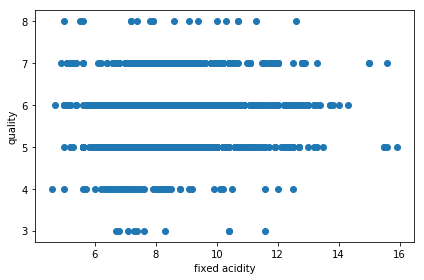

In [161]:
plt.scatter(data['fixed acidity'],data['quality'])
plt.xlabel('fixed acidity')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that fixed acidity may have some outliers for quality 3 & 8 and for range fixed acidity > 15.

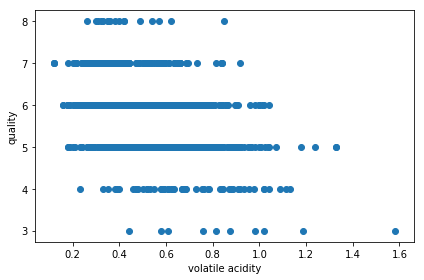

In [162]:
plt.scatter(data['volatile acidity'],data['quality'])
plt.xlabel('volatile acidity')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the data is continous within range 0.2 to 1.1. Ans it seem to have some outliers too in it.

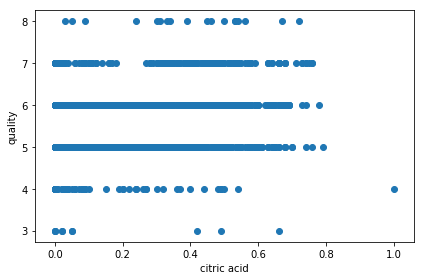

In [163]:
plt.scatter(data['citric acid'],data['quality'])
plt.xlabel('citric acid')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the citric acid column  is continous within range 0.0 to 0.8. And it seems to have some outliers too in it.

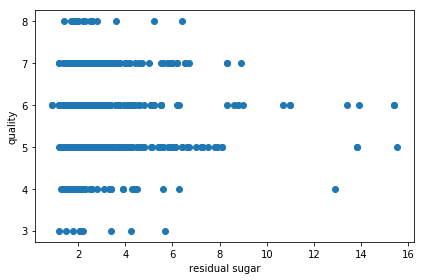

In [164]:
plt.scatter(data['residual sugar'],data['quality'])
plt.xlabel('residual sugar')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the residual sugar column  is continous within range 2 to 8. And it seems to have some outliers too in it for quality 4,5,6.

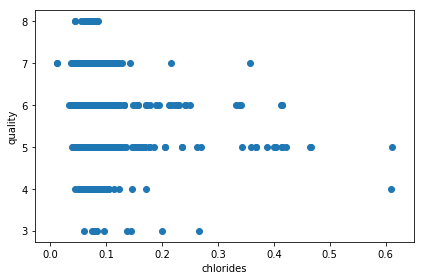

In [165]:
plt.scatter(data['chlorides'],data['quality'])
plt.xlabel('chlorides')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the chlorides column  is continous within range 0.0 to 0.5. And it seems to have some outliers too in it for quality 4,5.

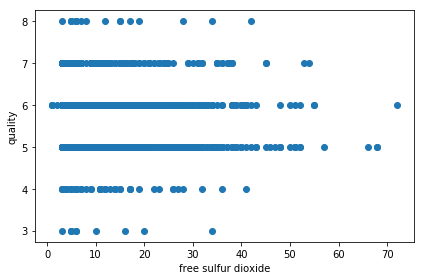

In [166]:
plt.scatter(data['free sulfur dioxide'],data['quality'])
plt.xlabel('free sulfur dioxide')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the free SO2 column  is continous within range 0 to 60. And it seems to have some outliers too in it.

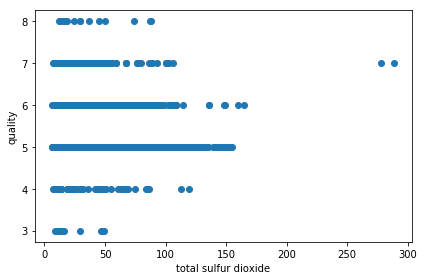

In [167]:
plt.scatter(data['total sulfur dioxide'],data['quality'])
plt.xlabel('total sulfur dioxide')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the total SO2 column  is continous within range 0 to 160. And it seems to have some outliers too in it for quality 7.

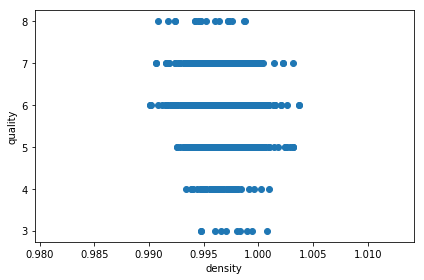

In [168]:
plt.scatter(data['density'],data['quality'])
plt.xlabel('density')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the density column  is continous within range 0.990 to 1.005.

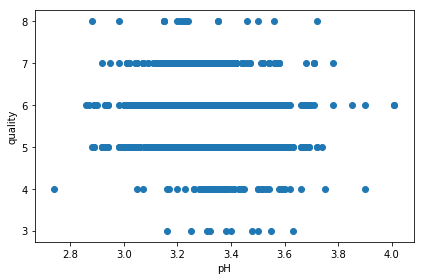

In [169]:
plt.scatter(data['pH'],data['quality'])
plt.xlabel('pH')
plt.ylabel("quality")
plt.tight_layout()

Here we can see that the pH column  is continous within range 2.8 to 3.8. And it seems to have some outliers too in it.

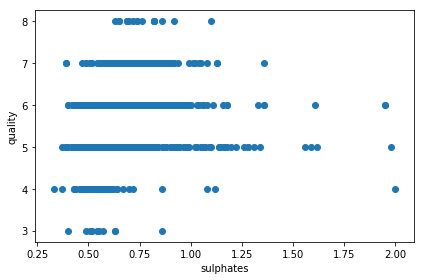

In [170]:
plt.scatter(data['sulphates'],data['quality'])
plt.xlabel('sulphates')
plt.ylabel("quality")
plt.tight_layout()

Here the data is continous and have outliers too.

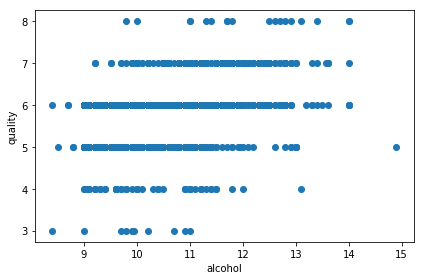

In [171]:
plt.scatter(data['alcohol'],data['quality'])
plt.xlabel('alcohol')
plt.ylabel("quality")
plt.tight_layout()

Here the data is continous for range 8 to 14.

### Checking Data Distribution

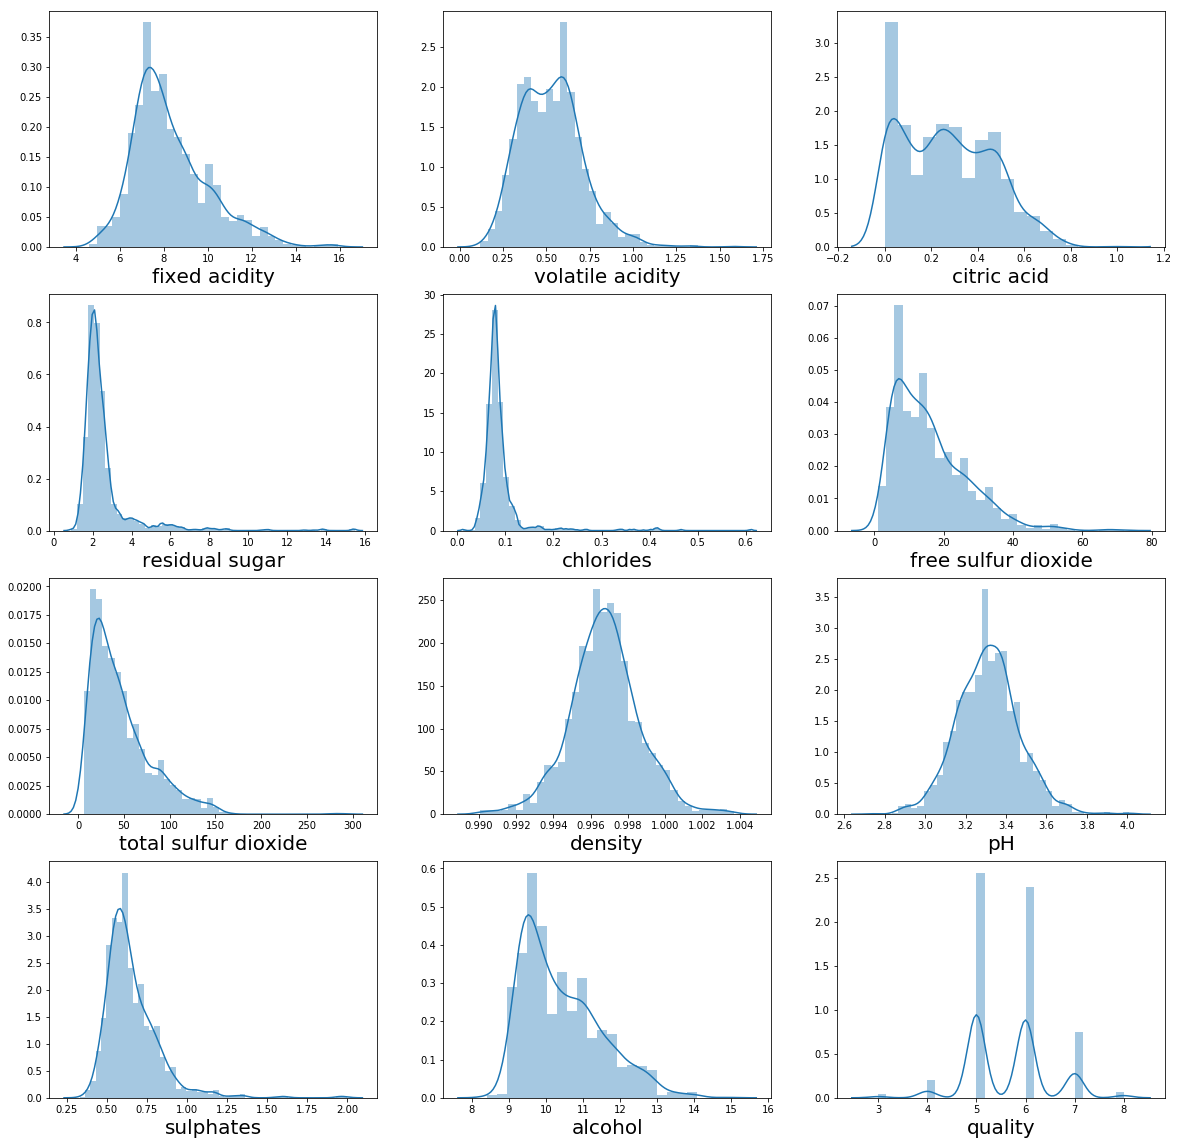

In [172]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

from the above graph:

    Graph1:
    
        In this the 'fixed acidity' column that is continous is seems to be skewed.
        
    Graph2:
    
        In this the 'volatile acidity' column i.e. continous column is not normally distributed.
        
    Graph3:
    
        In this the 'citric acid' column  it seems to be that data is  normally distributed.
        
    Graph4:
    
        In this the 'residual sugar' column the data is highly skewed.
        
    Graph5:
    
        In this the 'chlorides' column the data is highly skewed.
        
    Graph6:
    
        In this column i.e. 'free sulfur dioxide' is not Normally Distributed or skewed.
        
    Graph7:
    
        In this column i.e. 'total sulfur dioxide' is not Normally Distributed or skewed.
        
    Graph8:
    
        In this column i.e. density is  normally distributed
        
    Graph9:
    
        In this column i.e. 'pH't is  normally distributed
        
    Graph 10:
    
        In this column i.e. 'sulphates' is not normally distributed
        
    Graph 11:
    
        In this column i.e. 'alcohol' is not normally distributed

In [173]:
data.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

As the columns:

    1. between range 0.5 to -0.5 that are 'citric acis', 'density', 'pH' are not skewed.
    
    2. all other columns are not symmetric they are highly/moderate skewed.

### Checking for Outliers

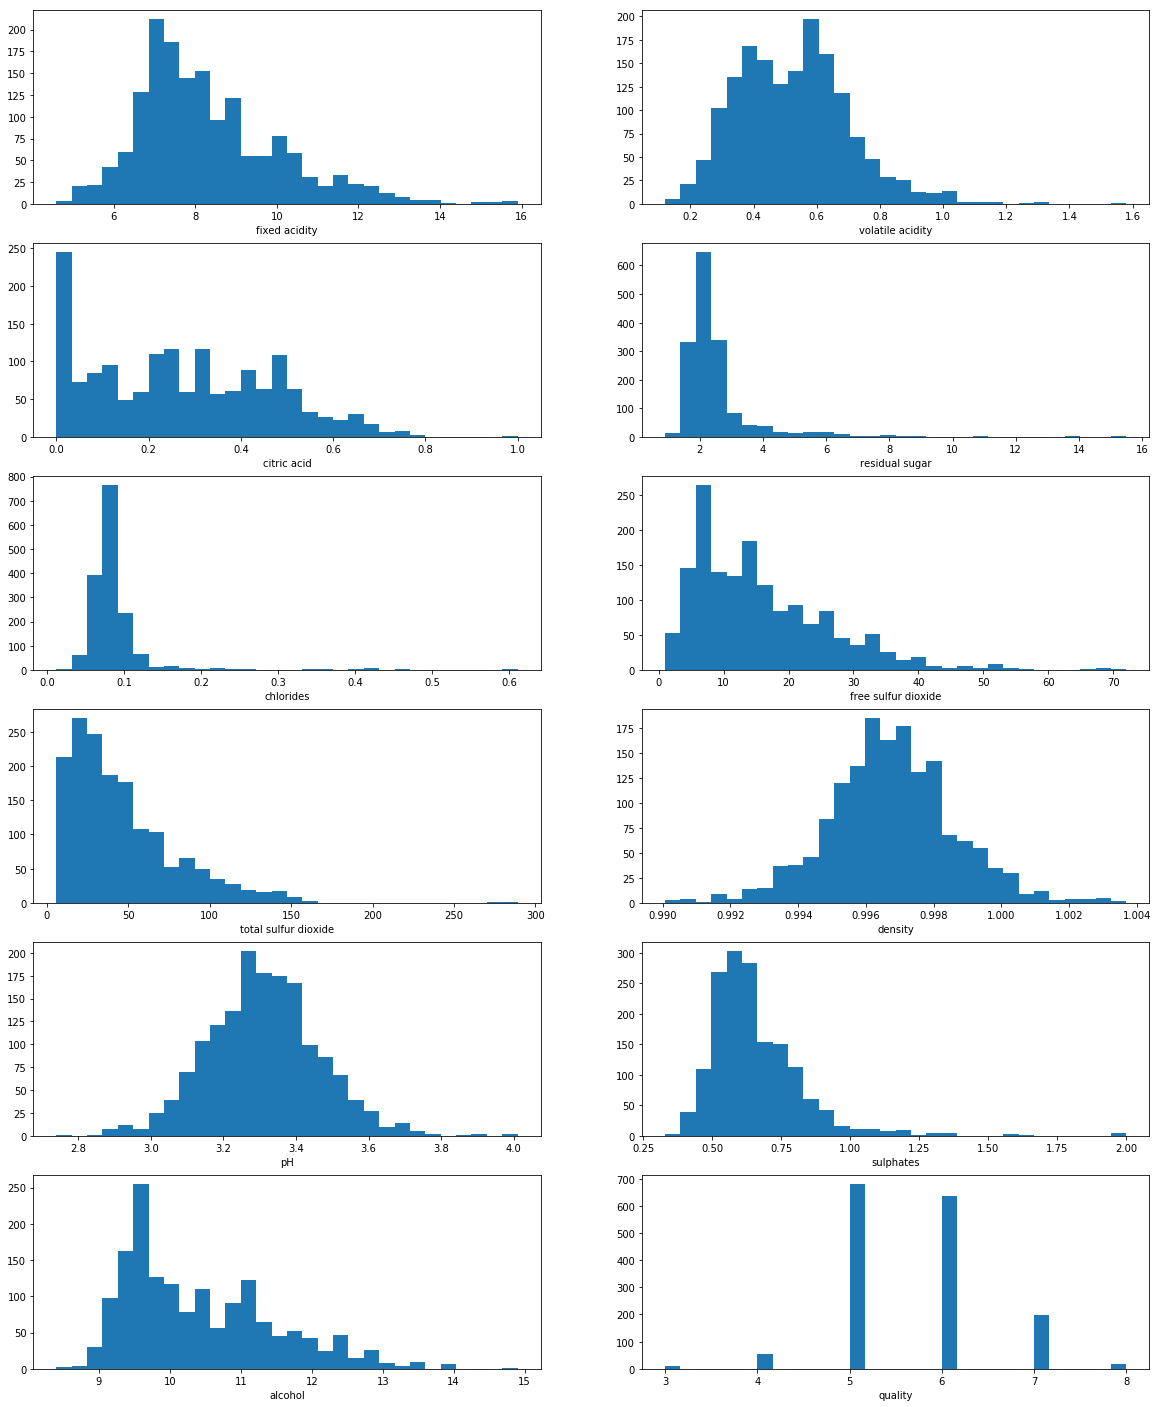

In [174]:
plt.figure(figsize=(20,25),facecolor='W')
grp=1
for col in data:
    if grp<=12:
        ax=plt.subplot(6,2,grp)
        plt.hist(data[col],bins=30)
        plt.xlabel(col)
    grp+=1
plt.show()

## from the above graph:

#####    Graph1:
    
        In this the 'fixed acidity' column it seems there are some outliers seems like that are greter than 13.
        
#####    Graph2:
    
        In this the 'volatile acidity' column it seems there are some outliers seems like that are greater 1.0.
        
#####    Graph3:
    
        In this the 'citric acid' column it seems there are some outliers seems like 1.0.
        
#####    Graph4:
    
        In this the 'residual sugar' column it seems there are some outliers seems like that are greater 4.
        
#####    Graph5:
    
        In this 'chlorides' column it seems there are some outliers seems like that are greater 0.12 & smaller then 0.05.
        
#####    Graph6:
    
        In this column i.e. 'free sulfur dioxide' it seems there are some outliers seems like that are greater 50.
        
#####    Graph7:
    
        In this column i.e. 'total sulfur dioxide' it seems there are some outliers seems like that are greater 160.
        
#####    Graph8:
    
        In this column i.e. density it seems there are some outliers seems like that are greater 1.001 & smaller then 0.992.
        
#####    Graph9:
    
        In this column i.e. 'pH' it seems there are some outliers seems like that are greater 3.7 & smaller then 2.9.
        
#####    Graph 10:
    
        In this column i.e. 'sulphates' it seems there are some outliers seems like that are greater 1.1.
        
#####    Graph 11:
    
        In this column i.e. 'alcohol' it seems there are some outliers seems like that are greater 14.

#### Multi Colinearity

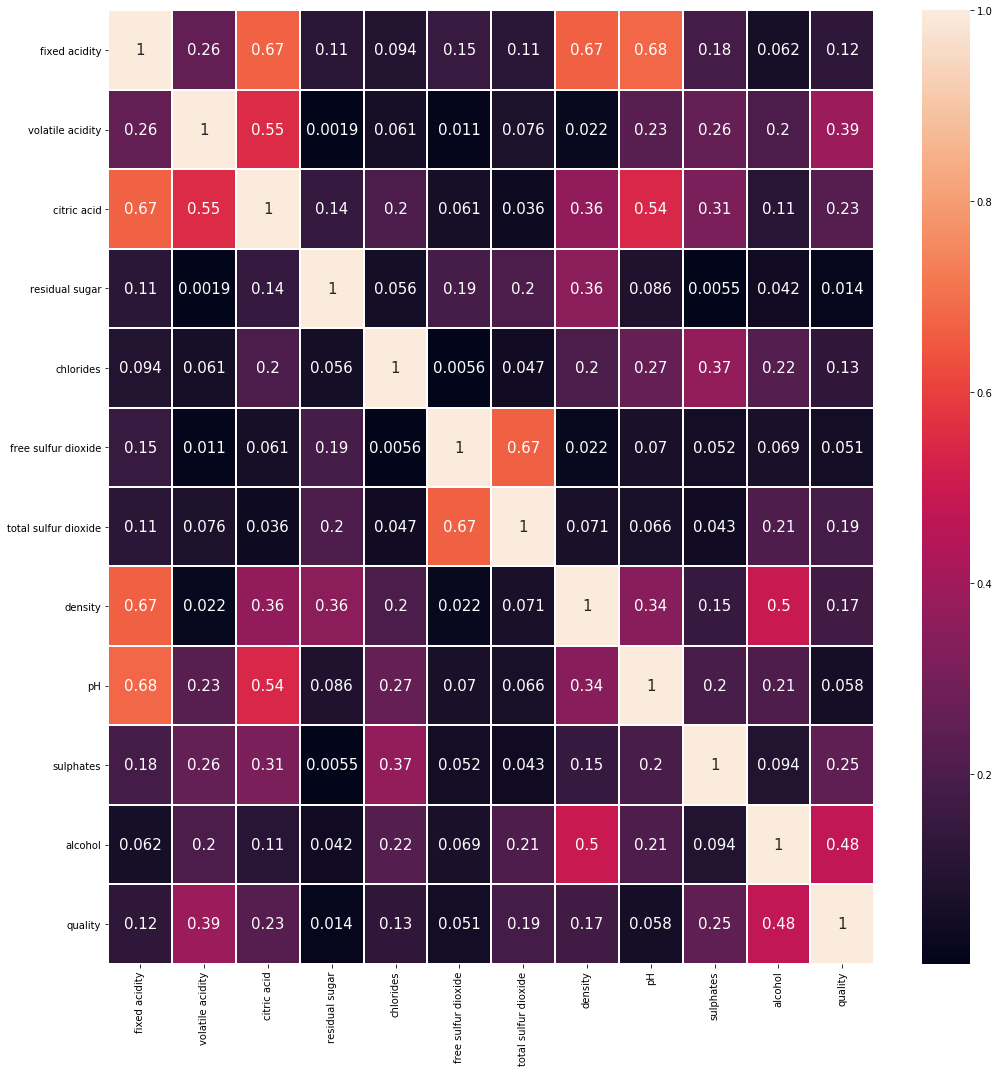

In [175]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

Its seems like there is problem existing with multicolinearity.:

    1. 'fixed acidity' is 67%,67% & 68% colinear with 'citric acid','density' & 'pH'.
    
    2.'free sulfur dioxde' is colinear with 'total sulfur dioxide' i.e. 67%.

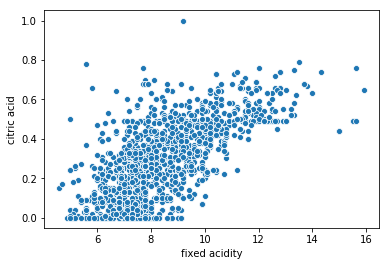

In [176]:
sns.scatterplot(data['fixed acidity'],data['citric acid'])
plt.show()

Here we can see the data is deviated. So, no need to removed column between them.

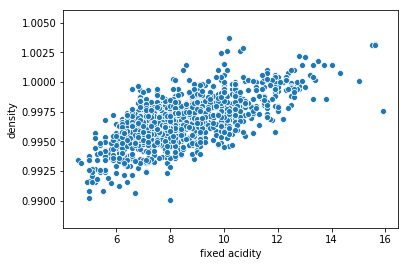

In [177]:
sns.scatterplot(data['fixed acidity'],data['density'])
plt.show()

Here we can see the data is deviated. So, no need to removed column between them.

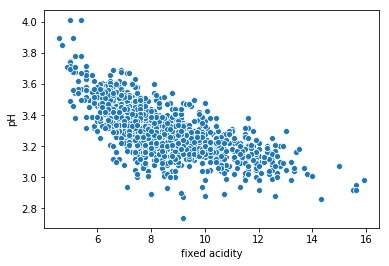

In [178]:
sns.scatterplot(data['fixed acidity'],data['pH'])
plt.show()

Here we can see the data is deviated. So, no need to removed column between them.

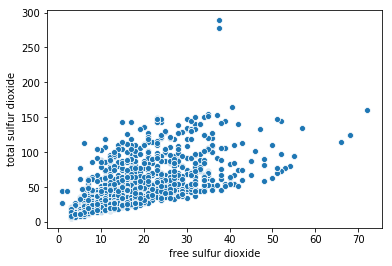

In [179]:
sns.scatterplot(data['free sulfur dioxide'],data['total sulfur dioxide'])
plt.show()

Here we can see the data is deviated. So, no need to removed column between them.

As we have done the analysis part. I conclude that there are outlier in all columns & data is skewed & no multi colinearity exists.

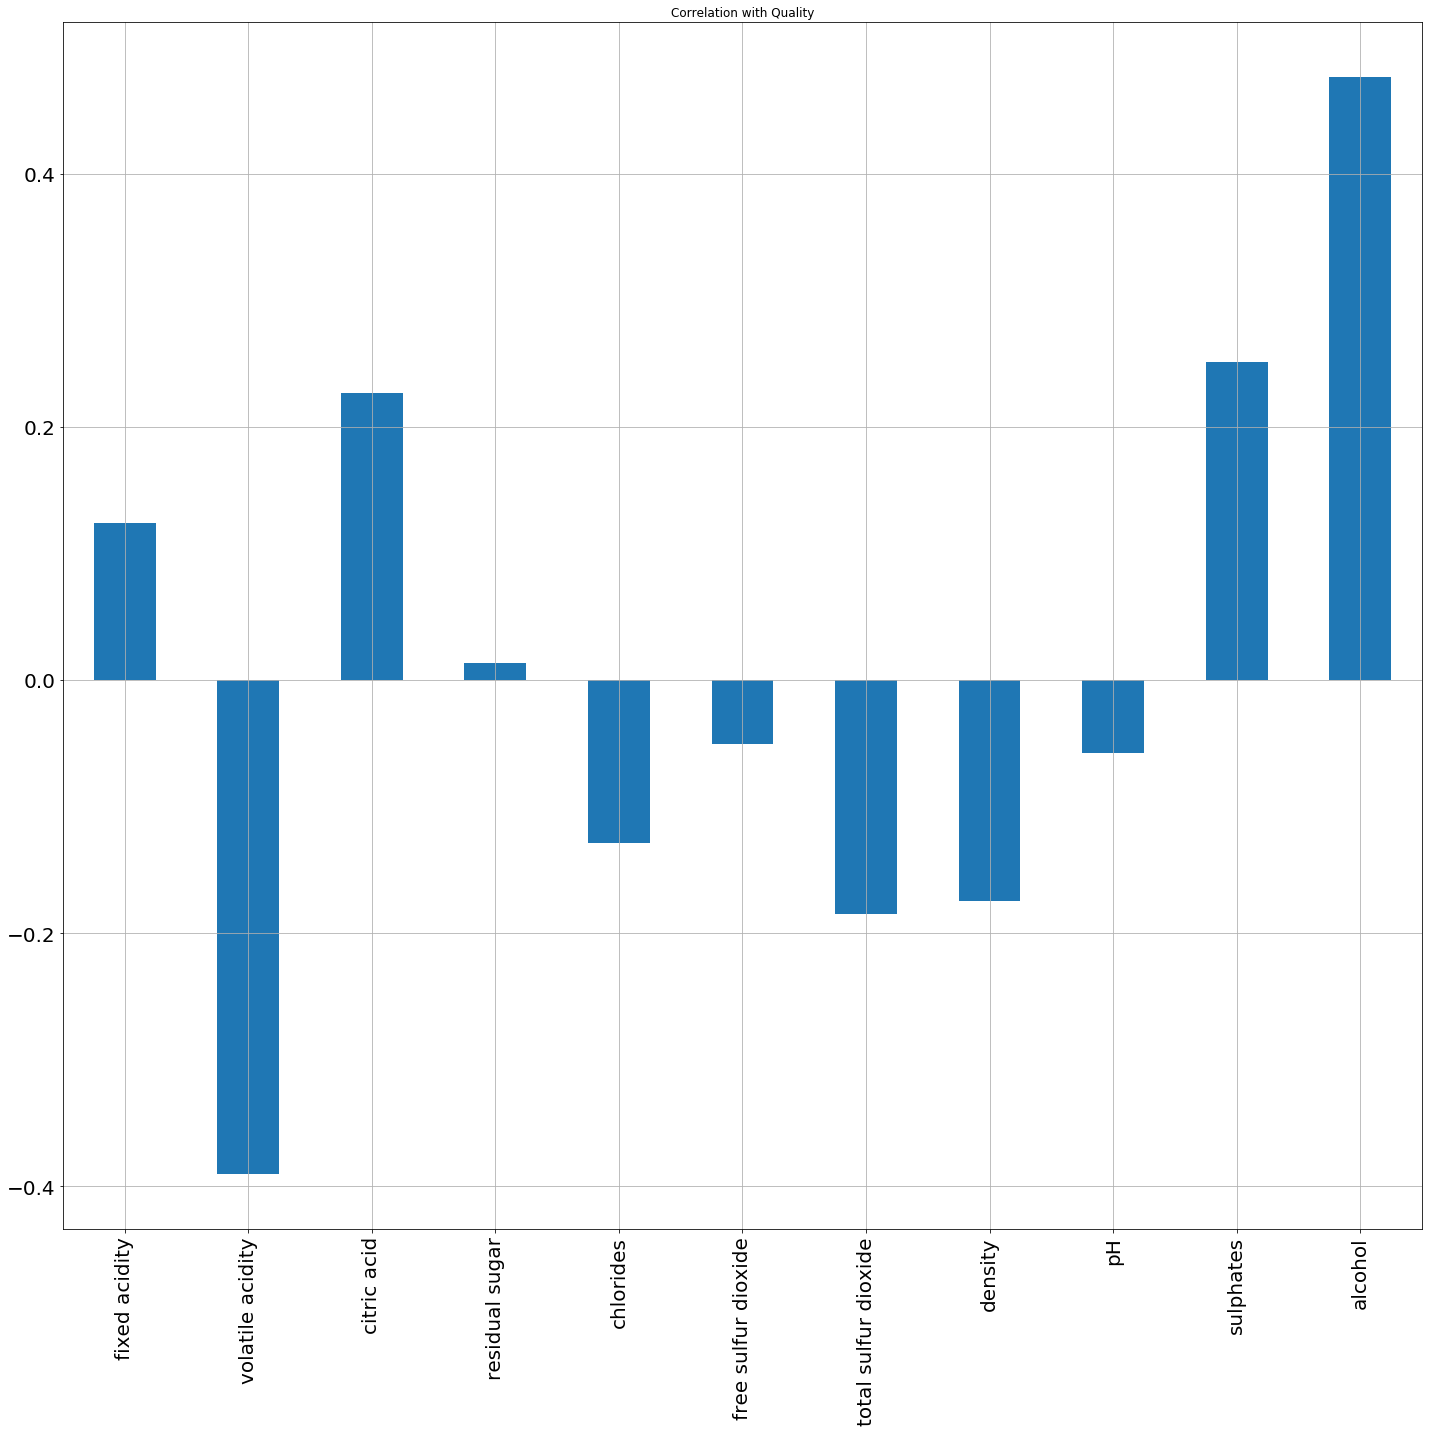

In [180]:
data.drop("quality",axis=1).corrwith(data.quality).plot(kind='bar',grid=True,figsize=(20,20),title='Correlation with Quality',fontsize=20)
plt.tight_layout()

Here we can see the features relations with the target variable. In this graph some features positively corelate with the target variabl & some are negatively correlated.

In [181]:
data.shape

(1599, 12)

Before cleaning we have 1599 records & 12 columns.

## Data Cleaning

In [182]:
data.drop_duplicates(inplace=True)
data.shape

(1359, 12)

there were some duplicates values in our data that we dropped.

In [183]:
col=data.columns.tolist()
col

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [184]:
zscore=zscore(data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<2.2).all(axis=1)
data=data[filtered]

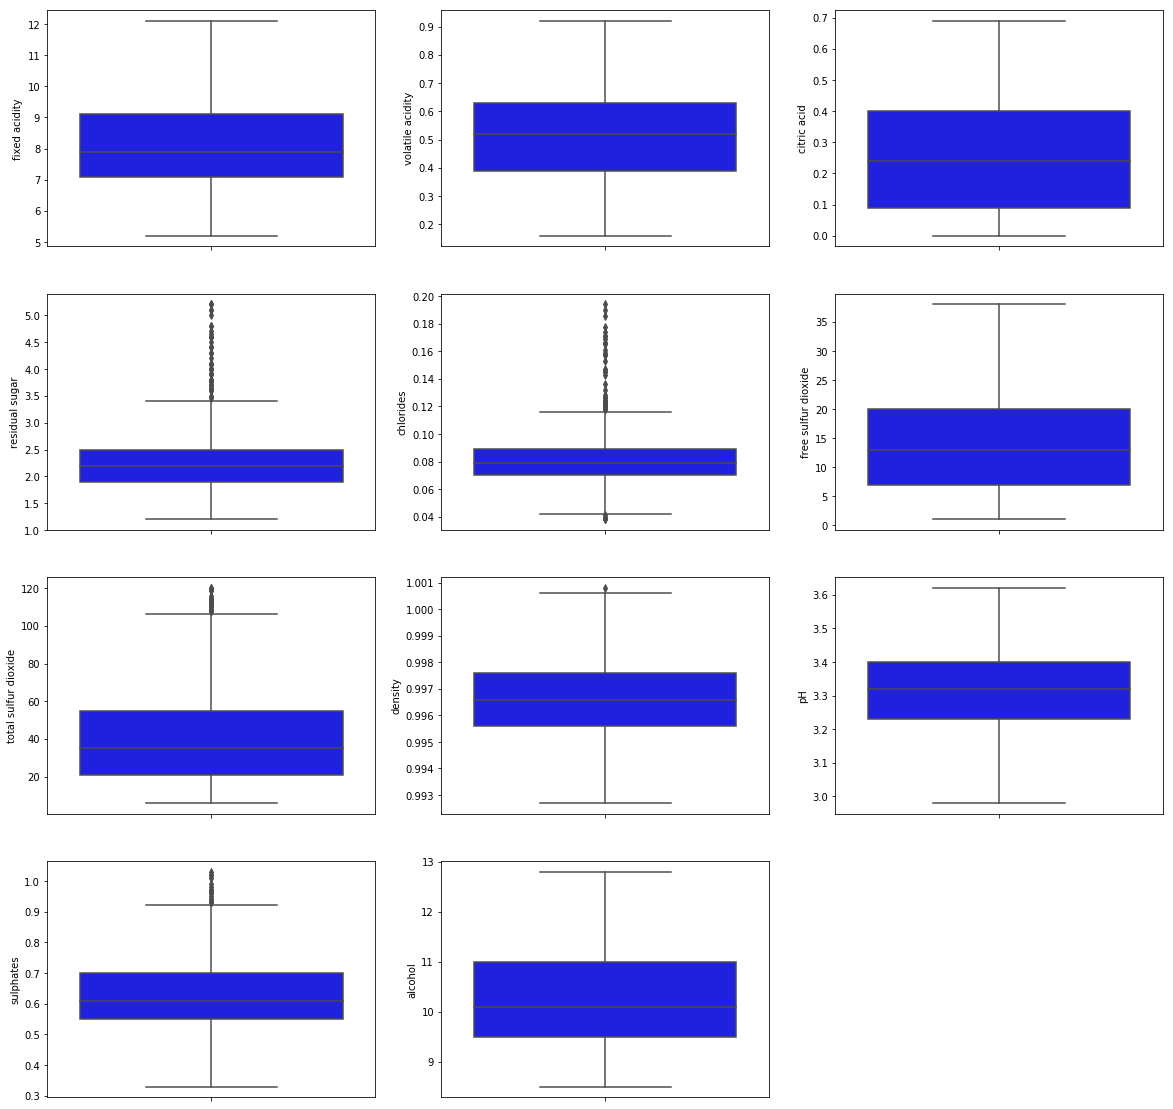

In [185]:
plotn=1
plt.figure(figsize=(20,20))
for col in data:
    if plotn<12:
        ax=plt.subplot(4,3,plotn)
        sns.boxplot(data[col],color='blue',orient='v')
    plotn+=1
plt.show()

there are still some outliers like in columns  'residual sugar', 'chlorides', ,'total sulfur dioxide','sulphates' but they are continous too. Let's see the Statiscal desciption of the data.

In [186]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000,1033.000000
mean,8.200000,0.518616,0.254308,2.283156,0.081053,14.661181,41.564376,0.996608,3.318015,0.633146,10.369700,5.636980
std,1.445315,0.162282,0.181375,0.615900,0.019633,8.516708,25.934622,0.001531,0.127455,0.116908,0.967288,0.773136
min,5.200000,0.160000,0.000000,1.200000,0.038000,1.000000,6.000000,0.992700,2.980000,0.330000,8.500000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.230000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.240000,2.200000,0.079000,13.000000,35.000000,0.996600,3.320000,0.610000,10.100000,6.000000
75%,9.100000,0.630000,0.400000,2.500000,0.089000,20.000000,55.000000,0.997600,3.400000,0.700000,11.000000,6.000000
max,12.100000,0.920000,0.690000,5.200000,0.194000,38.000000,120.000000,1.000800,3.620000,1.030000,12.800000,8.000000


Here we can see the 
    'residual sugar' has max value of 5.2
    'chlorides' has max value of 0.194
    'total sulfur dioxide' has max value of 120
    'sulphates' has max value of 1.03

In [187]:
data=data[(data['residual sugar'] < 4.0) & (data['chlorides']<0.14) & (data['total sulfur dioxide']<110) & (data['sulphates']<0.95)]
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.80,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.40,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.99590,3.28,0.54,9.20,5
12,5.6,0.615,0.00,1.6,0.089,16.0,59.0,0.99430,3.58,0.52,9.90,5


In [188]:
data.shape

(953, 12)

### Loss of data

In [189]:
print("Loss of data is:"+str((1599-953)/1599*100)+"%")

Loss of data is:40.40025015634772%


We losted 40% data that had duplicates values & outliers in it.

In [190]:
features=['alcohol','sulphates','total sulfur dioxide','free sulfur dioxide','residual sugar','fixed acidity']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,alcohol,sulphates,total sulfur dioxide,free sulfur dioxide,residual sugar,fixed acidity
0,-1.119993,-0.576109,-0.034632,-0.247852,-0.597085,-0.455084
1,-0.516042,0.564369,1.121104,1.185850,0.894893,-0.124163
2,-0.516042,0.304989,0.738037,0.262661,0.330795,-0.124163
3,-0.516042,-0.365729,0.923298,0.479343,-0.597085,1.762863
5,-1.119993,-0.576109,0.229324,0.022444,-0.869215,-0.455084


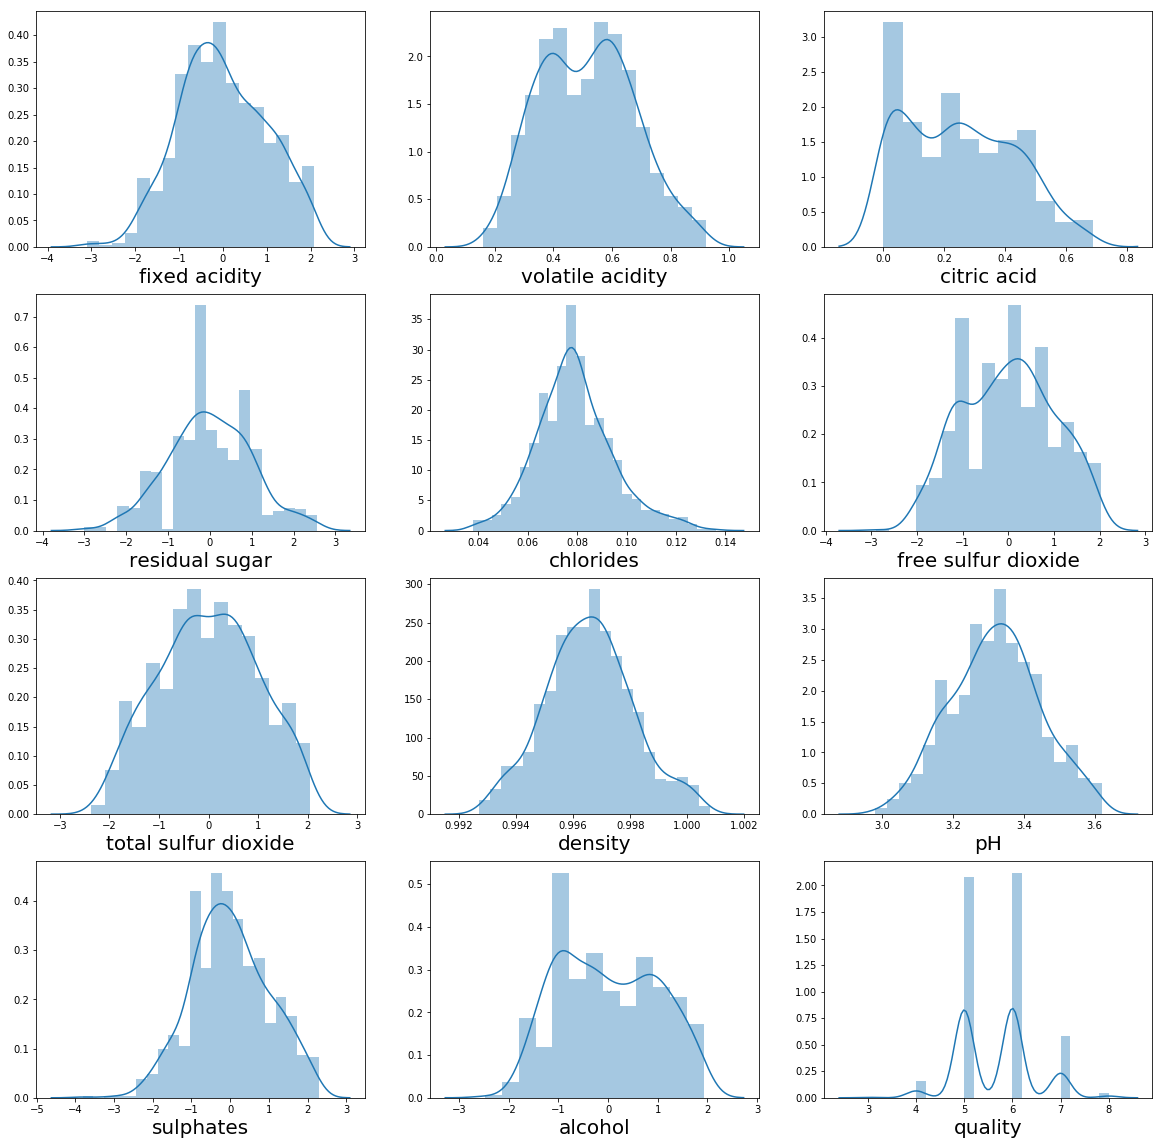

In [191]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Here we can see all the columns are normally distributed now.

In [192]:
data.skew()

fixed acidity           0.032399
volatile acidity        0.173233
citric acid             0.279579
residual sugar          0.003207
chlorides               0.434373
free sulfur dioxide    -0.028161
total sulfur dioxide   -0.025955
density                 0.140080
pH                      0.007839
sulphates               0.016307
alcohol                 0.110128
quality                 0.270555
dtype: float64

Here we can see all the columns are symmetric now.

## Model Deployment

In [193]:
X=data.drop(columns=['quality'],axis=1)
Y=data['quality']

split data into features & labels.

### Normalizing the data

In [194]:
scalar=StandardScaler()

In [195]:
X_=scalar.fit_transform(X)

In [196]:
X_

array([[-0.45508369,  1.14953539, -1.39438093, ...,  1.50047397,
        -0.57610903, -1.11999333],
       [-0.12416322,  2.27089622, -1.39438093, ..., -0.94645153,
         0.56436883, -0.51604201],
       [-0.12416322,  1.52332233, -1.17346825, ..., -0.47285305,
         0.30498882, -0.51604201],
       ...,
       [-1.68678335,  0.52655716, -0.95255556, ...,  1.02687548,
        -0.36572877,  0.32478639],
       [-2.0669823 ,  0.80689736, -0.73164288, ...,  1.97407245,
         0.80873171, -0.00627981],
       [-1.93636173, -1.28007973,  1.20134312, ...,  0.553277  ,
         0.39319037,  0.79627249]])

In [197]:
X_train,X_test,Y_train,Y_test=train_test_split(X_,Y,test_size=0.2,random_state=3562)

divided the features and labels  into train & test dataset.

In [198]:
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
lr=LogisticRegression()
svm=SVC()
knn=KNeighborsClassifier()

Assigned all object for the algorithm that are used like DecisionTree,RandomForest, Logistic Regression, SVM, KNeighbors.

## Decision Tree 

In [199]:
dt.fit(X_train,Y_train)
print("Trained Decision tree model using training data")

print("\nOur model learned the trained data with:"+str(dt.score(X_train,Y_train)*100)+"%")


Y_pred=dt.predict(X_test)
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

cv=LeaveOneOut()
acc_cv_dt=cross_val_score(dt,X_,Y,scoring='accuracy',cv=cv,n_jobs=-1)
dt_cvScore=acc_cv_dt.mean()
print("CV Score for Decision Tree model:"+str(acc_cv_dt.mean()*100)+"%")

print("Accuracy of Decision Tree Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")
dt_acc=accuracy_score(Y_test,Y_pred)

print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for Decision tree model:\n",classification_report(Y_test,Y_pred))

Trained Decision tree model using training data

Our model learned the trained data with:100.0%


Predicted values:
 [6 5 5 6 7 5 5 5 6 6 5 6 6 7 5 7 5 6 5 5 5 5 5 6 5 7 6 5 7 8 6 5 6 5 6 6 6
 7 5 6 6 7 5 5 5 5 7 5 5 6 4 6 5 5 6 5 5 7 6 5 6 5 5 6 6 6 5 5 5 7 6 6 7 6
 6 5 7 4 6 6 7 6 6 6 5 5 6 6 6 5 6 7 5 5 5 5 6 4 5 5 5 5 5 5 5 7 7 5 6 5 6
 6 6 5 5 6 5 5 5 6 5 7 5 6 6 5 8 5 6 6 5 5 6 6 7 7 4 5 5 5 5 5 5 6 5 5 7 5
 5 5 7 6 5 5 5 5 7 5 6 6 4 6 5 5 6 6 6 7 6 6 5 5 6 7 5 5 5 6 6 6 6 8 5 5 6
 6 6 6 6 6 6]


The dataframe for the actual & predicted values:

       Actual data  Predicted
892             6          6
1025            6          5
1054            6          5
1509            5          6
1080            6          7
412             5          5
129             5          5
152             5          5
594             5          6
1123            6          6
880             5          5
888             6          6
1497            6          6
855             7          7
615   

## Random Forest

In [200]:
rf.fit(X_train,Y_train)
print("Trained Random Forest model using training data")

print("\nOur model learned the trained data with:"+str(rf.score(X_train,Y_train)*100)+"%")


Y_pred=rf.predict(X_test)
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

cv=LeaveOneOut()
acc_cv_rf=cross_val_score(rf,X_,Y,scoring='accuracy',cv=cv,n_jobs=-1)
rf_cvScore=acc_cv_rf.mean()
print("CV Score for Random Forest model:"+str(acc_cv_rf.mean()*100)+"%")

print("Accuracy of Random Forest Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")
rf_acc=accuracy_score(Y_test,Y_pred)

print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for Random Forest model:\n",classification_report(Y_test,Y_pred))

Trained Random Forest model using training data

Our model learned the trained data with:100.0%


Predicted values:
 [6 6 5 7 7 5 5 5 5 6 5 6 6 6 5 6 5 6 5 5 5 5 6 6 5 7 6 5 6 6 6 5 6 6 6 5 5
 6 5 6 6 6 5 6 5 5 6 6 5 5 5 6 6 5 6 6 5 6 6 5 5 6 5 6 6 6 5 5 5 6 6 5 7 6
 5 5 7 5 5 5 5 6 5 5 5 5 6 5 5 5 6 5 6 5 5 5 5 5 5 5 6 5 5 5 5 6 6 5 6 6 6
 5 5 5 5 6 6 5 5 6 5 6 5 6 6 6 6 5 6 6 6 5 6 6 6 6 6 5 5 5 5 6 6 6 5 5 7 6
 5 6 6 5 5 5 6 5 6 5 6 6 6 6 5 5 5 6 6 6 6 5 5 5 6 6 6 5 5 6 6 5 5 7 5 5 6
 6 6 6 6 5 6]


The dataframe for the actual & predicted values:

       Actual data  Predicted
892             6          6
1025            6          6
1054            6          5
1509            5          7
1080            6          7
412             5          5
129             5          5
152             5          5
594             5          5
1123            6          6
880             5          5
888             6          6
1497            6          6
855             7          6
615   

## Logistic Regression

In [201]:
lr.fit(X_train,Y_train)
print("Trained Logistic  Regression model using training data")

print("\nour model learned the trained data with:"+str(lr.score(X_train,Y_train)*100)+"%")


Y_pred=lr.predict(X_test)
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

cv=LeaveOneOut()
acc_cv_lr=cross_val_score(lr,X_,Y,scoring='accuracy',cv=cv,n_jobs=-1)
lr_cvScore=acc_cv_lr.mean()
print("CV Score for Logistic  Regression model:"+str(acc_cv_lr.mean()*100)+"%")

print("Accuracy of Logistic  Regression Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")
lr_acc=accuracy_score(Y_test,Y_pred)

print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for Logistic  Regression model:\n",classification_report(Y_test,Y_pred))

Trained Logistic  Regression model using training data

our model learned the trained data with:62.20472440944882%


Predicted values:
 [6 5 5 6 6 5 5 5 5 6 5 6 6 6 5 6 5 5 5 5 5 5 6 6 5 7 6 5 6 6 6 5 6 6 6 5 5
 7 5 6 6 6 5 6 5 5 6 5 5 6 6 6 6 5 6 6 5 6 6 6 5 6 5 6 6 6 5 5 5 6 5 5 7 6
 5 5 6 5 5 6 5 5 5 5 5 5 6 6 5 5 6 5 6 5 5 5 5 5 5 5 6 5 5 5 5 6 7 5 5 6 5
 6 6 5 5 6 6 5 5 5 5 7 5 6 6 6 6 5 6 6 6 5 6 6 7 6 6 5 5 5 5 6 6 6 5 5 6 6
 5 6 7 5 5 5 6 5 6 6 6 6 6 5 4 5 6 6 6 6 6 6 5 5 6 5 6 6 5 6 6 5 5 6 5 5 5
 6 6 6 7 5 6]


The dataframe for the actual & predicted values:

       Actual data  Predicted
892             6          6
1025            6          5
1054            6          5
1509            5          6
1080            6          6
412             5          5
129             5          5
152             5          5
594             5          5
1123            6          6
880             5          5
888             6          6
1497            6          6
855             

## SVM

In [202]:
svm.fit(X_train,Y_train)
print("Trained SVM model using training data")

print("\nour model learned the trained data with:"+str(svm.score(X_train,Y_train)*100)+"%")


Y_pred=svm.predict(X_test)
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

cv=LeaveOneOut()
acc_cv_svm=cross_val_score(svm,X_,Y,scoring='accuracy',cv=cv,n_jobs=-1)
svm_cvScore=acc_cv_svm.mean()
print("CV Score for SVM model:"+str(acc_cv_svm.mean()*100)+"%")

print("Accuracy of SVM Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")
svm_acc=accuracy_score(Y_test,Y_pred)

print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for Decision tree model:\n",classification_report(Y_test,Y_pred))

Trained SVM model using training data

our model learned the trained data with:67.97900262467192%


Predicted values:
 [6 5 5 7 7 5 5 5 5 6 5 6 6 6 5 6 5 5 5 5 5 5 6 6 5 7 6 5 6 6 6 5 6 6 6 5 5
 6 5 6 6 6 5 6 5 5 6 5 5 5 5 6 6 6 6 6 5 6 6 5 5 6 5 6 6 6 5 5 5 6 6 5 7 6
 5 5 6 5 5 5 5 5 5 5 5 5 6 6 5 5 6 5 6 5 5 5 5 6 5 5 6 5 5 5 5 6 7 5 5 6 6
 5 6 5 5 6 6 5 5 5 5 6 5 6 6 6 6 5 6 6 6 5 6 6 6 6 6 6 5 5 5 6 6 6 5 5 6 6
 5 6 6 5 5 5 6 5 6 6 6 6 6 6 5 5 6 6 5 6 6 6 5 5 6 5 6 5 5 6 6 5 5 7 5 5 5
 6 6 6 6 5 6]


The dataframe for the actual & predicted values:

       Actual data  Predicted
892             6          6
1025            6          5
1054            6          5
1509            5          7
1080            6          7
412             5          5
129             5          5
152             5          5
594             5          5
1123            6          6
880             5          5
888             6          6
1497            6          6
855             7          6
615 

## KNN

In [203]:
knn.fit(X_train,Y_train)
print("Trained KNN model using training data")

print("\nour model learned the trained data with:"+str(knn.score(X_train,Y_train)*100)+"%")


Y_pred=knn.predict(X_test)
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))

cv=LeaveOneOut()
acc_cv_knn=cross_val_score(knn,X_,Y,scoring='accuracy',cv=cv,n_jobs=-1)
knn_cvScore=acc_cv_knn.mean()
print("CV Score for knn model:"+str(acc_cv_knn.mean()*100)+"%")

print("Accuracy of KNN Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")
knn_acc=accuracy_score(Y_test,Y_pred)

print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for KNN model:\n",classification_report(Y_test,Y_pred))

Trained KNN model using training data

our model learned the trained data with:68.89763779527559%


Predicted values:
 [5 5 5 7 7 5 5 5 5 6 5 6 6 6 5 6 5 5 5 5 5 5 5 6 6 7 6 5 6 6 5 5 6 6 6 6 5
 6 5 6 5 5 5 6 6 5 6 6 5 5 4 5 6 6 6 5 5 6 6 5 6 5 5 6 6 6 6 5 5 6 6 5 7 5
 5 5 5 6 5 6 5 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5 5 6 5 5 5 6 6 5 5 6 6 6 5 5 6
 6 5 5 5 5 7 5 5 5 5 6 5 6 6 6 6 5 6 6 5 5 6 5 6 6 6 5 5 5 5 5 6 5 5 6 6 6
 5 6 6 6 5 5 6 5 7 6 6 6 6 6 5 5 6 6 6 6 6 6 6 5 6 5 6 5 5 7 6 5 5 7 5 5 5
 6 6 5 7 5 6]


The dataframe for the actual & predicted values:

       Actual data  Predicted
892             6          5
1025            6          5
1054            6          5
1509            5          7
1080            6          7
412             5          5
129             5          5
152             5          5
594             5          5
1123            6          6
880             5          5
888             6          6
1497            6          6
855             7          6
615 

In [205]:
diff_acc_cv={"Decisiontree":dt_cvScore-dt_acc,"RandomForest":rf_cvScore-rf_acc,"LogisticRegression":lr_cvScore-lr_acc,"SVM":svm_cvScore-svm_acc,"KNN":knn_cvScore-knn_acc}

In [206]:
diff_acc_cv

{'Decisiontree': -0.0366656960933508,
 'RandomForest': -0.030128060739576856,
 'LogisticRegression': 0.02325530290128175,
 'SVM': -0.025985727078446152,
 'KNN': 0.02106876603506158}

The least difference between the CV Score & accuracy of the model we get 0.021 the least value that is developed by the KNN algorithm.

So, we use KNN model for Hyperparameter tuning.

## Hyperparameter Tuning

In [219]:
params_grid={
    'algorithm':['kd_tree','brute'],
    'leaf_size':[6,7,8,9,10,11,14],
    'n_neighbors':[3,5,7,9,11,13],
    'weights':['uniform','distance']
}
kfold=KFold()

In [220]:
# Search for best hyperparameters
grid = GridSearchCV(estimator=knn, param_grid=params_grid, cv=kfold, scoring='accuracy')
grid.fit(X, Y)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [6, 7, 8, 9, 10, 11, 14],
                         'n_neighbors': [3, 5, 7, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [221]:
grid.best_params_

{'algorithm': 'kd_tree',
 'leaf_size': 6,
 'n_neighbors': 7,
 'weights': 'distance'}

In [222]:
knn=KNeighborsClassifier(algorithm='kd_tree',leaf_size=6,n_neighbors=7,weights='distance')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=6, n_neighbors=7,
                     weights='distance')

In [224]:
Y_pred=knn.predict(X_test)

In [225]:
print("\n\nPredicted values:\n",Y_pred)

print("\n\nThe dataframe for the actual & predicted values:\n\n",pd.DataFrame({"Actual data":Y_test,"Predicted":Y_pred}))


print("Accuracy of KNN Model: "+str(accuracy_score(Y_test,Y_pred)*100)+"%")


print("\n\nConfusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

print("\n\n\n Classification report for KNN model:\n",classification_report(Y_test,Y_pred))



Predicted values:
 [5 5 5 7 7 5 6 5 5 6 5 6 6 6 5 6 5 6 5 6 5 5 5 6 5 7 6 5 7 6 6 5 6 6 6 5 5
 6 5 6 5 6 5 6 6 5 6 6 5 5 5 5 6 6 6 6 6 6 6 5 6 6 5 5 6 6 6 5 5 6 6 5 7 5
 5 5 7 6 5 5 5 6 5 5 5 5 6 6 5 5 6 5 6 5 5 5 5 5 5 5 6 5 5 5 5 6 6 6 6 5 6
 6 6 5 5 5 7 5 6 6 5 6 5 6 6 6 6 5 6 6 6 5 6 5 6 6 6 5 5 5 5 5 6 5 5 6 7 6
 5 6 6 5 5 5 6 5 7 6 6 6 6 6 5 6 6 6 6 6 6 6 5 5 6 6 6 5 5 7 6 5 5 7 5 5 6
 6 6 6 7 5 6]


The dataframe for the actual & predicted values:

       Actual data  Predicted
892             6          5
1025            6          5
1054            6          5
1509            5          7
1080            6          7
412             5          5
129             5          6
152             5          5
594             5          5
1123            6          6
880             5          5
888             6          6
1497            6          6
855             7          6
615             5          5
1508            6          6
304             5          5
696            

Earlier our model accuracy was 54 now its 59 %.

## Saving Model

In [227]:
pickle.dump(knn,open("Practice4_model.pickle","wb"))